# 1. Sredjivanje podataka 


In [1]:
!pip install requests

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
# common imports
import zipfile
import time
# import datetime, timedelta
import datetime
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
import pandas as pd
import pickle
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from io import StringIO
import requests
import json
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import math
from subprocess import check_output
import seaborn as sns
from IPython.display import display
import logging
from colorama import Fore, Back, Style

import re
import os

from scipy.stats import pearsonr



In [3]:
Months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "July ", "Aug ", "Sept ", "Oct ", "Nov ", "Dec "]
Years = [ "2014" , "2015" ,"2016" , "2017"]

for year in Years:
    for month in Months:
        file = 'data/ttc-streetcar-delay-data-' + year + '.xlsx'
        sheet =  month + year
        if( year == "2014"  and  month == "Jan " ): 
            data_original = pd.read_excel( file ,  sheet)
            print( "Podaci iz " + file + " , " + sheet + '  su ucitani')
        if( year == "2017"  and  month == "Sept " ): 
            # print(Fore.RED + 'Podaci iz ' + file + " , " + sheet + '  nisu ucitani')
            # print(Style.RESET_ALL)
            print( "Podaci iz " + file + " , " + sheet + '  nisu ucitani')
        else:
            data_original = data_original.append(pd.read_excel( file ,  sheet))
            print( "Podaci iz " + file + " , " + sheet + '  su ucitani')
          

Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jan 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jan 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Feb 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Mar 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Apr 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , May 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jun 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , July 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Aug 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Sept 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Oct 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Nov 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Dec 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2015.xlsx

In [4]:
data_original

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [5]:
data = data_original
data


,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50374 entries, 0 to 1697
Data columns (total 10 columns):
Report Date    50374 non-null datetime64[ns]
Route          50374 non-null int64
Time           50374 non-null object
Day            50374 non-null object
Location       50245 non-null object
Incident       50374 non-null object
Min Delay      50362 non-null float64
Min Gap        50360 non-null float64
Direction      50298 non-null object
Vehicle        46481 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [7]:
# If one intends to keep the same variable name, don't forget the inplace=True (this performs the operation in-place)
# data.sort_values(by=['Min_Delay'], ascending=False, inplace=True)

data_sorted_by_Min_Delay = data.sort_values(by=['Min Delay'], ascending=False)
data_sorted_by_Min_Delay

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
269,2016-08-09,501,06:37:00,Tuesday,Spadina at Queen,Investigation,1400.0,145.0,B/W,4224.0
82,2017-05-02,504,05:15:00,Tuesday,Spadina to church on King,Diversion,1185.0,1190.0,B/W,4145.0
85,2017-05-02,514,06:15:00,Tuesday,King & Church,Diversion,1125.0,1130.0,B/W,4412.0
614,2017-02-14,512,09:34:00,Tuesday,St Clair/Yonge,Investigation,1020.0,1024.0,B/W,4170.0
1275,2016-12-25,501,04:30:00,Sunday,Queen and Coxwell,General Delay,1008.0,1014.0,W/B,4043.0
...,...,...,...,...,...,...,...,...,...,...
607,2016-09-17,514,17:03:00,Saturday,King and Atlantic,Mechanical,NaN,0.0,W/B,4400.0
1250,2017-01-30,509,22:53:00,Monday,Queens Quay and Bay,Held By,NaN,NaN,W/B,4412.0
178,2017-03-05,505,06:54:00,Sunday,Jarvis,Investigation,NaN,32.0,E/B,4037.0
927,2017-03-26,509,20:00:00,Sunday,Union Stn,Utilized Off Route,NaN,NaN,E/B,4428.0


In [8]:
# Brisanje svih podataka iz Data Frame data
# data = data[0:0] 
# data

In [9]:
# Kod iz projekta cs228_project_Predicting_Streetcar_Delays
#
# Brisanje svih podataka tipa np.nan, np.inf, -np.inf iz Data Frame
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame" 
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

# def clean_dataset(df):
#   assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#   df.dropna(inplace=True)
#   indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#   return df[indices_to_keep].astype(np.float64)

In [10]:
data.isnull().values.any()

True

In [11]:
data = clean_dataset(data)
data

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Dundas and Sherborne,Held By,8.0,16.0,E/B,4164.0
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [12]:
data.isnull().values.any()

False

In [13]:
# data = data.drop("Incident", axis='columns')
# data.drop(columns=['Incident', 'Location'])
del data['Incident']
del data['Location']

In [14]:
data

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,8.0,16.0,E/B,4164.0
1694,2017-12-31,501,21:15:00,Sunday,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,5.0,10.0,S/B,4447.0


# Clean up Direction

Sledeći deo koda modifikuje podatke iz kolone Direction na primer zamenjuje E/B sa e, W/B sa w, S/B sa s, N/B sa n

In [15]:
# KOd iz cs228_project_Predicting_Streetcar_Delays

valid_directions = ['e','w','s','n','b']

def check_direction (x):
    if x in valid_directions:
        return(x)
    else:
        return("bad direction")
    

def direction_cleanup(df):
    print( "Direction count pre cleanup", df['Direction'].nunique() )
    df['Direction'] = df['Direction'].str.lower()
    df['Direction'] = df['Direction'].str.replace('/','')
    df['Direction'] = df['Direction'].replace({'eastbound':'e','westbound':'w','southbound':'s','northbound':'n'})
    df['Direction'] = df['Direction'].replace( 'b','', regex = True )
    df['Direction'] = df['Direction'].apply( lambda x:check_direction(x) )
    print( "Direction count post cleanup", df['Direction'].nunique() )
    return(df)

In [16]:
data = direction_cleanup(data)

Direction count pre cleanup 77
Direction count post cleanup 5


In [17]:
data

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,4.0,8.0,e,4018.0
1,2014-01-02,504,12:43:00,Thursday,20.0,22.0,e,4128.0
2,2014-01-02,501,14:01:00,Thursday,13.0,19.0,w,4016.0
3,2014-01-02,504,14:22:00,Thursday,7.0,11.0,w,4175.0
4,2014-01-02,504,16:42:00,Thursday,3.0,6.0,e,4080.0
...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,8.0,16.0,e,4164.0
1694,2017-12-31,501,21:15:00,Sunday,12.0,24.0,w,4110.0
1695,2017-12-31,501,21:44:00,Sunday,12.0,24.0,w,1419.0
1696,2017-12-31,510,22:15:00,Sunday,5.0,10.0,s,4447.0


In [18]:
data[data['Direction'].str.contains('bad direction')]

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle
1218,2014-03-29,501,22:38:00,Saturday,9.0,18.0,bad direction,4221.0
654,2014-04-16,512,11:05:00,Wednesday,33.0,43.0,bad direction,4185.0
1083,2014-04-29,506,11:02:00,Tuesday,23.0,23.0,bad direction,4064.0
425,2014-05-14,501,16:39:00,Wednesday,6.0,12.0,bad direction,4233.0
672,2014-05-22,505,09:09:00,Thursday,5.0,10.0,bad direction,4019.0
1004,2014-06-26,504,18:49:00,Thursday,31.0,34.0,bad direction,4062.0
297,2014-07-08,505,15:17:00,Tuesday,55.0,65.0,bad direction,4164.0
422,2014-08-14,501,15:09:00,Thursday,14.0,24.0,bad direction,4215.0
241,2014-09-07,501,06:23:00,Sunday,5.0,11.0,bad direction,7957.0
897,2014-10-28,506,16:40:00,Tuesday,5.0,10.0,bad direction,4088.0


In [19]:
indexNames = data[data['Direction'].isin(['bad direction'])].index
len(indexNames)


60

In [20]:
data.drop(indexNames, axis=0, inplace=True)
data

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,4.0,8.0,e,4018.0
1,2014-01-02,504,12:43:00,Thursday,20.0,22.0,e,4128.0
2,2014-01-02,501,14:01:00,Thursday,13.0,19.0,w,4016.0
3,2014-01-02,504,14:22:00,Thursday,7.0,11.0,w,4175.0
4,2014-01-02,504,16:42:00,Thursday,3.0,6.0,e,4080.0
...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,8.0,16.0,e,4164.0
1694,2017-12-31,501,21:15:00,Sunday,12.0,24.0,w,4110.0
1695,2017-12-31,501,21:44:00,Sunday,12.0,24.0,w,1419.0
1696,2017-12-31,510,22:15:00,Sunday,5.0,10.0,s,4447.0


In [21]:
data[data['Direction'].str.contains('bad direction')]

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle


In [22]:
data[data['Direction'].str.contains('bad direction')].shape

(0, 8)

In [23]:
data['Direction'] = data['Direction'].replace( {'e':'1','w':'2','s':'3','n':'4'} )

In [24]:
data

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,4.0,8.0,1,4018.0
1,2014-01-02,504,12:43:00,Thursday,20.0,22.0,1,4128.0
2,2014-01-02,501,14:01:00,Thursday,13.0,19.0,2,4016.0
3,2014-01-02,504,14:22:00,Thursday,7.0,11.0,2,4175.0
4,2014-01-02,504,16:42:00,Thursday,3.0,6.0,1,4080.0
...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,8.0,16.0,1,4164.0
1694,2017-12-31,501,21:15:00,Sunday,12.0,24.0,2,4110.0
1695,2017-12-31,501,21:44:00,Sunday,12.0,24.0,2,1419.0
1696,2017-12-31,510,22:15:00,Sunday,5.0,10.0,3,4447.0



# Datum i Vreme

In [25]:
# Kod iz projekta cs228_project_Predicting_Streetcar_Delays
#
# Dodavanje nove kolone Report Date Time koja sadrzi podatke iz kolone Report Date i Time
def replace_time(date_time_value,time_value):
    ''' given a datetime replace the time portion '''
     
    date_time_value = date_time_value.replace(hour=time_value.hour, minute=time_value.minute, second=time_value.second)
    return(date_time_value)


In [26]:
#Kod iz projekta cs228_project_Predicting_Streetcar_Delays
#
data['Report Date Time'] = data.apply(lambda x: replace_time(x['Report Date'], x['Time']), axis=1)


In [27]:
data

,Report Date,Route,Time,Day,Min Delay,Min Gap,Direction,Vehicle,Report Date Time
0,2014-01-02,505,06:31:00,Thursday,4.0,8.0,1,4018.0,2014-01-02 06:31:00
1,2014-01-02,504,12:43:00,Thursday,20.0,22.0,1,4128.0,2014-01-02 12:43:00
2,2014-01-02,501,14:01:00,Thursday,13.0,19.0,2,4016.0,2014-01-02 14:01:00
3,2014-01-02,504,14:22:00,Thursday,7.0,11.0,2,4175.0,2014-01-02 14:22:00
4,2014-01-02,504,16:42:00,Thursday,3.0,6.0,1,4080.0,2014-01-02 16:42:00
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,8.0,16.0,1,4164.0,2017-12-31 17:42:00
1694,2017-12-31,501,21:15:00,Sunday,12.0,24.0,2,4110.0,2017-12-31 21:15:00
1695,2017-12-31,501,21:44:00,Sunday,12.0,24.0,2,1419.0,2017-12-31 21:44:00
1696,2017-12-31,510,22:15:00,Sunday,5.0,10.0,3,4447.0,2017-12-31 22:15:00


In [28]:
# Creating the year column form date time stamp.
data['year'] = data['Report Date Time'].dt.year

# Creating the month column form date time stamp.
data['month'] = data['Report Date Time'].dt.month

# Creating the day column form date time stamp.
data['day'] = data['Report Date Time'].dt.day

# Creating the hour column form date time stamp.
data['hour'] = data['Report Date Time'].dt.hour

del data['Report Date Time']
del data['Time']
del data['Report Date']

In [29]:
# Dodavanje kolone Day in the week koja umesto naziva dana sadrzi brojeve 
data['Day'] = data['Day'].str.lower() 
data['Day in the week'] = data['Day'].replace({'monday':'1','tuesday':'2','wednesday':'3','thursday':'4','friday':'5','saturday':'6','sunday':'7' })

del data['Day']

In [30]:
data

,Route,Min Delay,Min Gap,Direction,Vehicle,year,month,day,hour,Day in the week
0,505,4.0,8.0,1,4018.0,2014,1,2,6,4
1,504,20.0,22.0,1,4128.0,2014,1,2,12,4
2,501,13.0,19.0,2,4016.0,2014,1,2,14,4
3,504,7.0,11.0,2,4175.0,2014,1,2,14,4
4,504,3.0,6.0,1,4080.0,2014,1,2,16,4
...,...,...,...,...,...,...,...,...,...,...
1692,505,8.0,16.0,1,4164.0,2017,12,31,17,7
1694,501,12.0,24.0,2,4110.0,2017,12,31,21,7
1695,501,12.0,24.0,2,1419.0,2017,12,31,21,7
1696,510,5.0,10.0,3,4447.0,2017,12,31,22,7


Dodavanje kolone Delay koja će imati vrednost 0 ako je vrednost u koloni Min Delay < 5 inače će imati vrednost 1. 0 znači nema kašnjenja. 1 znači ima kašnjenja

In [31]:
data["Delay"] = [0 if x < 5 else 1 for x in data['Min Delay'] ]
# isto se dobija i na sledeći način
# data['Delay'] = np.where(data['Min Delay'] < 5, 0, 1 )


In [32]:
data

,Route,Min Delay,Min Gap,Direction,Vehicle,year,month,day,hour,Day in the week,Delay
0,505,4.0,8.0,1,4018.0,2014,1,2,6,4,0
1,504,20.0,22.0,1,4128.0,2014,1,2,12,4,1
2,501,13.0,19.0,2,4016.0,2014,1,2,14,4,1
3,504,7.0,11.0,2,4175.0,2014,1,2,14,4,1
4,504,3.0,6.0,1,4080.0,2014,1,2,16,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1692,505,8.0,16.0,1,4164.0,2017,12,31,17,7,1
1694,501,12.0,24.0,2,4110.0,2017,12,31,21,7,1
1695,501,12.0,24.0,2,1419.0,2017,12,31,21,7,1
1696,510,5.0,10.0,3,4447.0,2017,12,31,22,7,1


In [33]:
data.describe() 

,Route,Min Delay,Min Gap,Vehicle,year,month,day,hour,Delay
count,44097.000000,44097.000000,44097.000000,44097.000000,44097.000000,44097.000000,44097.000000,44097.000000,44097.000000
mean,501.106923,12.879742,18.548631,4306.401138,2015.567567,6.453205,15.757671,11.518675,0.766492
std,42.289394,29.949959,35.922603,1448.949492,1.094407,3.496836,8.804372,5.780930,0.423067
min,1.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000
25%,501.000000,5.000000,9.000000,4069.000000,2015.000000,3.000000,8.000000,6.000000,1.000000
50%,505.000000,6.000000,12.000000,4147.000000,2016.000000,6.000000,16.000000,11.000000,1.000000
75%,509.000000,12.000000,20.000000,4221.000000,2017.000000,10.000000,23.000000,16.000000,1.000000
max,999.000000,1400.000000,4216.000000,163242.000000,2017.000000,12.000000,31.000000,23.000000,1.000000


In [34]:
del data['Min Delay']

In [35]:
data

,Route,Min Gap,Direction,Vehicle,year,month,day,hour,Day in the week,Delay
0,505,8.0,1,4018.0,2014,1,2,6,4,0
1,504,22.0,1,4128.0,2014,1,2,12,4,1
2,501,19.0,2,4016.0,2014,1,2,14,4,1
3,504,11.0,2,4175.0,2014,1,2,14,4,1
4,504,6.0,1,4080.0,2014,1,2,16,4,0
...,...,...,...,...,...,...,...,...,...,...
1692,505,16.0,1,4164.0,2017,12,31,17,7,1
1694,501,24.0,2,4110.0,2017,12,31,21,7,1
1695,501,24.0,2,1419.0,2017,12,31,21,7,1
1696,510,10.0,3,4447.0,2017,12,31,22,7,1


In [36]:
data['Vehicle'] = data['Vehicle'].astype(int)
data['Min Gap'] = data['Min Gap'].astype(int)

In [37]:
data

,Route,Min Gap,Direction,Vehicle,year,month,day,hour,Day in the week,Delay
0,505,8,1,4018,2014,1,2,6,4,0
1,504,22,1,4128,2014,1,2,12,4,1
2,501,19,2,4016,2014,1,2,14,4,1
3,504,11,2,4175,2014,1,2,14,4,1
4,504,6,1,4080,2014,1,2,16,4,0
...,...,...,...,...,...,...,...,...,...,...
1692,505,16,1,4164,2017,12,31,17,7,1
1694,501,24,2,4110,2017,12,31,21,7,1
1695,501,24,2,1419,2017,12,31,21,7,1
1696,510,10,3,4447,2017,12,31,22,7,1


In [38]:
data['Vehicle'].nunique()

1891

In [39]:
count_no_delay = data[data['Delay']==0].shape[0]
count_delay = data[data['Delay']==1].shape[0]
print("count of no delay ",count_no_delay)
print("count of delay ",count_delay)
# define weighting factor for delay outcome
one_weight = count_no_delay/count_delay
print("one_weight is ",one_weight)

count of no delay  10297
count of delay  33800
one_weight is  0.3046449704142012


In [40]:
# for col in data.columns:
#    print(col)
feature_names = data.columns
feature_names

Index(['Route', 'Min Gap', 'Direction', 'Vehicle', 'year', 'month', 'day',
       'hour', 'Day in the week', 'Delay'],
      dtype='object')

In [43]:
# data2 = del data['Delay']
corrcoefs = data.corr()['Delay']
corrcoefs

Route     -0.058558
Min Gap    0.182387
Vehicle   -0.029564
year       0.049970
month      0.033366
day       -0.004111
hour       0.093742
Delay      1.000000
Name: Delay, dtype: float64

In [44]:
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh

Route     -0.058558
Min Gap    0.182387
Vehicle   -0.029564
year       0.049970
month      0.033366
day       -0.004111
hour       0.093742
Name: Delay, dtype: float64

In [45]:
# corrcoefs = []
# for feature in data.columns: 
#    corrcoef = data.corr(data[feature].values, 'Delay')[0, 1]
#    corrcoefs.append(corrcoef)
#    print (feature, corrcoef)
    

In [46]:
# corrcoefs = []
# for feature in data.columns:
#    corrcoef = np.corrcoef(data[feature].values, 'Delay')[0, 1]
#    corrcoefs.append(corrcoef)
#    print (feature, corrcoef)

IndexError: arrays used as indices must be of integer (or boolean) type

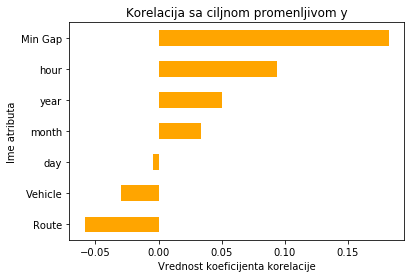

In [47]:
number_of_features = len(data.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange')

plt.title("Korelacija sa ciljnom promenljivom y")
plt.ylabel('Ime atributa')
plt.xlabel('Vrednost koeficijenta korelacije')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [48]:
y = data['Delay']
del data['Delay']
X = data

In [49]:
X.head()

,Route,Min Gap,Direction,Vehicle,year,month,day,hour,Day in the week
0,505,8,1,4018,2014,1,2,6,4
1,504,22,1,4128,2014,1,2,12,4
2,501,19,2,4016,2014,1,2,14,4
3,504,11,2,4175,2014,1,2,14,4
4,504,6,1,4080,2014,1,2,16,4


In [50]:
X.corr()

,Route,Min Gap,Vehicle,year,month,day,hour
Route,1.000000,-0.053687,0.005526,0.016738,0.004556,0.010730,0.124493
Min Gap,-0.053687,1.000000,-0.019424,-0.008610,0.015395,-0.003428,0.027278
Vehicle,0.005526,-0.019424,1.000000,-0.045679,0.002518,-0.000993,0.014255
year,0.016738,-0.008610,-0.045679,1.000000,-0.046356,0.020010,0.012978
month,0.004556,0.015395,0.002518,-0.046356,1.000000,0.037713,0.016398
day,0.010730,-0.003428,-0.000993,0.020010,0.037713,1.000000,0.005784
hour,0.124493,0.027278,0.014255,0.012978,0.016398,0.005784,1.000000


In [51]:
number_of_features = X.shape[1]

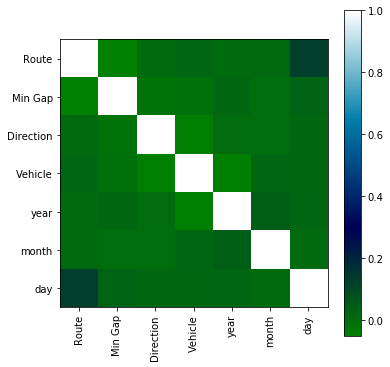

In [52]:
plt.figure(figsize = (6, 6))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistička regresija

In [53]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [55]:
X_train.shape

(29544, 9)

In [56]:
X_test.shape

(14553, 9)

In [57]:
 y_train.shape
    

(29544,)

In [58]:
y_test.shape

(14553,)

In [59]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Delay: ', d_train, '  Without Delay: ', wd_train)

Delay:  22645   Without Delay:  6899


In [61]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Delay: ', d_test, '  Without Delay: ', wd_test)

Delay:  11155   Without Delay:  3398


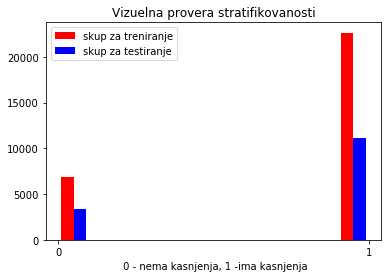

In [62]:
plt.title("Vizuelna provera stratifikovanosti")
plt.xticks([0,1])
plt.xlabel(' 0 - nema kasnjenja, 1 -ima kasnjenja')
plt.hist([y_train, y_test], color=['red', 'blue'], label=['skup za treniranje', 'skup za testiranje'])
plt.legend(loc='best')
plt.show()

# Učenje modela

In [63]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [64]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model.intercept_

array([6.22068776])

In [66]:
model.coef_

array([[-5.77917686e-02,  2.37137591e+01, -1.01984906e-01,
        -7.83727411e-02,  1.90658548e-02,  2.82560623e-02,
        -3.66612250e-02,  6.35622407e-02,  1.21195948e-01]])

### Evaluacija

In [67]:
y_test_predicted = model.predict(X_test)

In [68]:
metrics.accuracy_score(y_test, y_test_predicted)

0.9597333883048169

In [69]:
metrics.precision_score(y_test, y_test_predicted)

0.9694412365639158

In [70]:
metrics.recall_score(y_test, y_test_predicted)

0.9783056925145674

In [71]:
metrics.f1_score(y_test, y_test_predicted)

0.9738532928788148

In [72]:
y_train_predicted = model.predict(X_train)

In [73]:
y_train_predicted[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [74]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [75]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [76]:
print("Tacnost na skupu za treniranje: {train}\nTacnost na skupu za testiranje: {test}".format(train=train_score, test=test_score))

Tacnost na skupu za treniranje: 0.9591795288383428
Tacnost na skupu za testiranje: 0.9597333883048169


In [77]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3398
           1       0.97      0.98      0.97     11155

    accuracy                           0.96     14553
   macro avg       0.95      0.94      0.94     14553
weighted avg       0.96      0.96      0.96     14553



In [78]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[ 3054,   344],
       [  242, 10913]], dtype=int64)

# Neuronske mreže

In [79]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [80]:
np.random.seed(7)

# Kreiranje neuronske mreže

Napravićemo mrežu sa propagacijom unapred. 
Mreža će imati ulazni sloj, tri skrivena sloja sa, redom, 100, 40 i 20 neurona, i izlazni sloj. 
Broj neurona ulaznog sloja odgovara broju atributa skupa podataka, a to je 9. 
Broj neurona izlaznog sloja je 1 pošto je u pitanju binarna klasifikacija. 
U skrivenim slojevima koristićemo relu aktivaciju, a u poslednjem, sigmoidnu funkciju.

In [81]:
number_of_features = X_train.shape[1]
output_size = 1

In [82]:
number_of_features

9

Biće korišnjeni: optimizator Adam, binarna unakrsna entropija kao funkciju greške, Pošto je zadatak klasifikacioni metrika će biti tačnost.
Alternativni način zadavanja optimizatora uz finija podešavanja parametara se može postići uključivanjem optimizer paketa, a funkcija gubitka uključivanjem losses paketa. Zahvaljujući ovim paketima umesto inicijalizacije niskama, potrebne parametre možemo inicijalizovati instancama odgovarajućih klasa.

In [83]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=output_size, activation='sigmoid'))

In [84]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 5,881
Trainable params: 5,881
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
739/739 [==============================] - 4s 5ms/step - loss: 0.5635 - accuracy: 0.7327 - val_loss: 0.4963 - val_accuracy: 0.7717
Epoch 2/50
739/739 [==============================] - 3s 4ms/step - loss: 0.4722 - accuracy: 0.7710 - val_loss: 0.4228 - val_accuracy: 0.7907
Epoch 3/50
739/739 [==============================] - 3s 5ms/step - loss: 0.3910 - accuracy: 0.8126 - val_loss: 0.3436 - val_accuracy: 0.8379
Epoch 4/50
739/739 [==============================] - 4s 6ms/step - loss: 0.3212 - accuracy: 0.8667 - val_loss: 0.2940 - val_accuracy: 0.8815
Epoch 5/50
739/739 [==============================] - 4s 5ms/step - loss: 0.2791 - accuracy: 0.8970 - val_loss: 0.2672 - val_accuracy: 0.9034
Epoch 6/50
739/739 [==============================] - 4s 5ms/step - loss: 0.2546 - accuracy: 0.9126 - val_loss: 0.2530 - val_accuracy: 0.9032
Epoch 7/50
739/739 [==============================] - 3s 5ms/step - loss: 0.2374 - accuracy: 0.9273 - val_loss: 0.2394 - val_accuracy: 0.9323
Epoch 

In [87]:
epochs = history.epoch

In [88]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

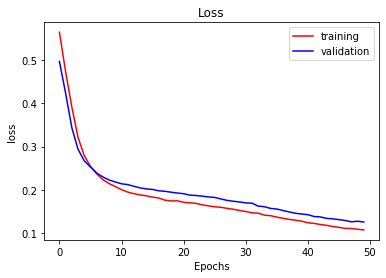

In [89]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

In [90]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

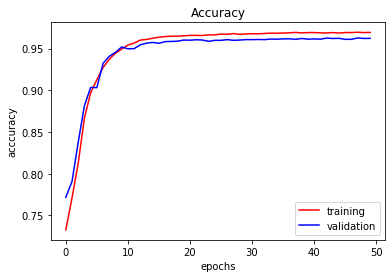

In [91]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

# Evaluacija mreže

In [92]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 0)

In [93]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

455/455 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.9680
Test loss: 0.10837049782276154, test accuracy: 0.9679791331291199


In [94]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

924/924 [==============================] - 3s 4ms/step - loss: 0.1006 - accuracy: 0.9719
Train loss: 0.10064735263586044, train accuracy: 0.971906304359436
